<a href="https://colab.research.google.com/github/fabioVitorTavares/EFC1-GCC253---Complexidade-e-Projeto-de-Algoritmos/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Fábio Vitor Tavares Furtado

**Matricula**: 201811178

**Turma**: 14A

Link do repositório GitHub: https://github.com/fabioVitorTavares/EFC1-GCC253---Complexidade-e-Projeto-de-Algoritmos

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [28]:
import numpy
import time
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(1000000)

global_1=0

#Quantidade de arrays
quantidadeArray = 200

#Intervalo dos números randomicos
intervalo = 500





# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [30]:
def insertionSort(array):
    c =  0
    ti = time.time();
    for i in range(1, len(array)):        
        chave = array[i]
        j = i-1
        c += 1
        while array[j] > chave and j > -1:
            c += 1
            array[j+1] = array[j]
            j = j-1          
        array[j+1] = chave       
    return time.time() - ti, c

##  Merge Sort


In [31]:
def merge(arr, c):    
    if(len(arr) > 1):        
        arrE = arr[:int(len(arr)/2)]
        arrD = arr[int(len(arr)/2):]       
        arrE = merge(arrE, c)
        arrD = merge(arrD, c)
        arr = sort(arrE, arrD, c)        
        return arr
    return arr    


def sort(arrE,arrD, c):   
    arrO = []
    while len(arrE) > 0 and len(arrD) > 0:
        c[0] += 1           
        if arrE[0] < arrD[0]:
            arrO.append(arrE[0])
            arrE = arrE[1:]
        else:
            arrO.append(arrD[0])
            arrD = arrD[1:]    
    while len(arrE) > 0:        
        arrO.append(arrE[0])
        arrE = arrE[1:]
    while len(arrD) > 0:          
        arrO.append(arrD[0])
        arrD = arrD[1:]   
    return arrO


def mergeSort(arr):
    c = [0]    
    ti = time.time()
    merge(arr, c)
    return time.time() - ti, c[0]

##  Selection Sort


In [32]:
def selectionSort(array):
    c = 0
    ti = time.time();    
    for i in range(len(array)):        
        for j in range(i+1,len(array)):
            c += 1
            if(array[j] < array[i]):
                array[i], array[j] = array[j], array[i]   
    return time.time() - ti, c   

##  Bubble Sort


In [33]:
def boobleSort(arr):
    c = 0
    ti = time.time()
    trocou = True
    for i in range(len(arr)-1):        
        if(trocou):
            trocou = False
            for j in range(len(arr)-i-1):
                c += 1
                if (arr[j] > arr[j+1]):
                    arr[j],arr[j+1] = arr[j+1], arr[j]
                    trocou = True
    return time.time() - ti, c

## Heap Sort

In [ ]:
def heapSort():
  
  return

## Quick Sort

> pivo = *A[A-comprimento]*

[23, 73, 148, 248, 373, 523, 698, 898, 1123, 1373, 1648, 1948, 2273, 2623, 2998, 3398, 3823, 4273, 4748, 5248, 5773, 6323, 6898, 7498, 8123, 8773, 9448, 10148, 10873, 11623, 12398, 13198, 14023, 14873, 15748, 16648, 17573, 18523, 19498, 20498, 21523, 22573, 23648, 24748, 25873, 27023, 28198, 29398, 30623, 31873, 33148, 34448, 35773, 37123, 38498, 39898, 41323, 42773, 44248, 45748, 47273, 48823, 50398, 51998, 53623, 55273, 56948, 58648, 60373, 62123, 63898, 65698, 67523, 69373, 71248, 73148, 75073, 77023, 78998, 80998, 83023, 85073, 87148, 89248, 91373, 93523, 95698, 97898, 100123, 102373, 104648, 106948, 109273, 111623, 113998, 116398, 118823, 121273, 123748, 126248, 128773, 131323, 133898, 136498, 139123, 141773, 144448, 147148, 149873, 152623, 155398, 158198, 161023, 163873, 166748, 169648, 172573, 175523, 178498, 181498, 184523, 187573, 190648, 193748, 196873, 200023, 203198, 206398, 209623, 212873, 216148, 219448, 222773, 226123, 229498, 232898, 236323, 239773, 243248, 246748, 2502

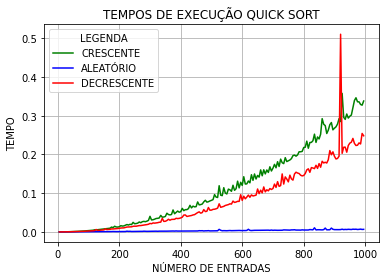

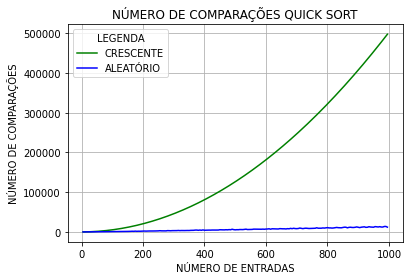

In [38]:
def particao(arr, ini, fim, c):    
    pivo = arr[fim]
    me = ini-1
    ma = ini-1
    for i in range(ini, fim+1):
        c[0] += 1       
        if arr[i] > pivo:
            
            ma += 1
        else:
            me += 1
            ma += 1
            arr[ma], arr[me] = arr[me], arr[ma]
    return me, c[0]

def quick(arr, ini, fim, c):     
    c[0] += 1
    if ini < fim:
        var = particao(arr, ini, fim, c)
        pp, c[0] = var[0], var[1]
        numeroComparacoes = quick(arr, ini, pp-1, c)
        numeroComparacoes = quick(arr, pp+1, fim, c)
    
    return c[0]

    

def quickSort(arr):
    c = [0]
    ti = time.time()
    c[0] = quick(arr, 0, len(arr)-1, c)
    return time.time() - ti, c[0]

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





Insertion Sort

    Melhor caso: No insertion sort o melhor caso acontece quando o vetor já está ordenado, a cada posição percorrida ele compara a posição atual com a anterior e como ela é menor que a atual ele não entra no laço e continua a iteração pelo vetor.

    Pior caso: O pior caso acontece quando o vetor está ordenado de forma contrária à que se deseja ordenar, pois a cada posição percorrida pelo laço principal também se percorre no laço interno da posição atual à posição zero do vetor.

Merge Sort

    Melhor caso:

    Pior caso:

Selection Sort

    Melhor caso:

    Pior caso:

Buble Sort

    Melhor caso:

    Pior caso:

Heap Sort

    Melhor caso:

    Pior caso:

Quick Sort

    Melhor caso:

    Pior caso:

2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [ ]:
    

timesArrayOrdenadoCrescente = []
timesArrayAleatorio = []
timesArrayOrdenadoDecrescente = []
comparacoesArrayOrdenadoCrescente = []
comparacoesArrayAleatorio = []
comparacoesArrayOrdenadoDecrescente = []
numeroEntradas = []


for i in range(5,1000,5):
    timesArrayOrdenadoCrescente.append(quickSort(numpy.arange(0,i,1))[0])
    timesArrayAleatorio.append(quickSort(numpy.random.randint(0, intervalo, i))[0])
    timesArrayOrdenadoDecrescente.append(quickSort(numpy.arange(i-1,-1,-1))[0])
    comparacoesArrayOrdenadoCrescente.append(quickSort(numpy.arange(0,i,1))[1])
    comparacoesArrayAleatorio.append(quickSort(numpy.random.randint(0, intervalo, i))[1])
    comparacoesArrayOrdenadoDecrescente.append(quickSort(numpy.arange(i-1,-1,-1))[1])
    numeroEntradas.append(i)

print(comparacoesArrayOrdenadoCrescente)
print(comparacoesArrayOrdenadoDecrescente)


plt.title("TEMPOS DE EXECUÇÃO QUICK SORT")
plt.plot(numeroEntradas,timesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,timesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,timesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("TEMPO")
plt.show()


plt.title("NÚMERO DE COMPARAÇÕES QUICK SORT")
plt.plot(numeroEntradas,comparacoesArrayOrdenadoCrescente, color='green')
plt.plot(numeroEntradas,comparacoesArrayAleatorio,color='blue')
plt.plot(numeroEntradas,comparacoesArrayOrdenadoDecrescente, color='red')
plt.legend(['CRESCENTE','ALEATÓRIO','DECRESCENTE'], title = "LEGENDA")
plt.grid(True)
plt.xlabel("NÚMERO DE ENTRADAS")
plt.ylabel("NÚMERO DE COMPARAÇÕES")
plt.show()